Facebook100 dataset
Each of the 100 plaintext ASCII files in FB100 folder contain edge list from 2005 snapshot of Facebook social network among university students and faculty within some university
Interpret edge list as simple graph

Edge list -> stores only edges themselves (i,j) without directly listing nodes

1. Convert edge list to adjacency list
2. figure the rest out TODO 

In [3]:
!pip3 install -I matplotlib 

  Using cached matplotlib-3.5.3-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
  Using cached Pillow-9.2.0-cp38-cp38-macosx_10_10_x86_64.whl (3.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached numpy-1.23.2-cp38-cp38-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


In [23]:
#import matplotlib.pyplot as plt
import os, time
import maplotlib.pyplot as plt

In [24]:
def getAll():
    edgeNums = {}
    networks = {}
    # get only files that dont have '_attr' in name
    # make network for each file 
    # networks = {schoolName: {adjacency list}....}
    for file in os.listdir('facebook100txt/'):
        if 'attr' not in file and file.endswith('.txt') and 'facebook' not in file:
            sName = file.split('.')[0]
            networks[sName] = {}
            with open(os.path.join('facebook100txt/', file), 'r') as f:
                lines = f.readlines()
                edgeNums[sName] = len(lines)
                for l in lines:
                    edge = l.strip().split('\t')
                    node1 = edge[0]
                    node2 = edge[1]
                    if node1 in networks[sName]:
                        networks[sName][node1].append(node2)
                    else:
                        networks[sName][node1] = [node2]
                    
                    if node2 in networks[sName]:
                        networks[sName][node2].append(node1)
                    else:
                        networks[sName][node2] = [node1]
                        
    return networks, edgeNums

# takes 170 s for all to run         
networks, edgeNums = getAll()


In [25]:
# calculate mean neighbor degree of a network

def calcMND(network, edgeNum):
    # sum of the degrees of each neighbor divided by number of edges*2
    # for node in network
    # for neighbor of node
    # get degree of neighbor
    mnd = 0
    
    for node in network:
        for neighbor in network[node]:
            neighborD = len(network[neighbor])
            mnd += neighborD
    mnd = mnd/edgeNum
        
    return mnd

# calculate mean degree of network
def calcMD(network, edgeNum):
    # sum the degrees of each node divided by number of edges
    md = 2*edgeNum/len(network)
    return md


mnd = calcMND(networks['UCSD34'], edgeNums['UCSD34'])
md = calcMD(networks['UCSD34'], edgeNums['UCSD34'])

In [26]:
paradoxRatios = []
meanDs = []
colors = []

for n in networks:
    network = networks[n]
    edgeNum = edgeNums[n]
    mnd = calcMND(network, edgeNum)
    md = calcMD(network, edgeNum)
    #print(mnd, md)
    paradoxRatios.append(mnd/md)
    meanDs.append(md)
    if 'Reed' in n:
        colors.append('red')
    elif 'Colgate' in n:
        colors.append('orange')
    elif 'Miss' in n:
        colors.append('pink')
    elif 'UCSB' in n:
        colors.append('cyan')
    elif 'Virginia' in n:
        colors.append('blue')
    else:
         colors.append('gray')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


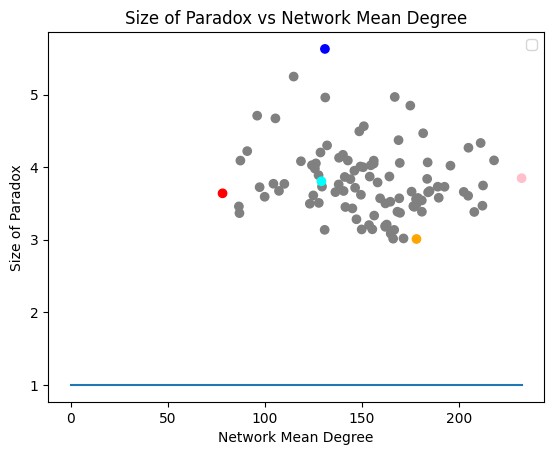

In [27]:
plt.scatter(meanDs, paradoxRatios, c=colors)
plt.plot([0, max(meanDs)],[1,1])
plt.title('Size of Paradox vs Network Mean Degree')
plt.xlabel('Network Mean Degree')
plt.ylabel('Size of Paradox')
plt.legend()
plt.show()
